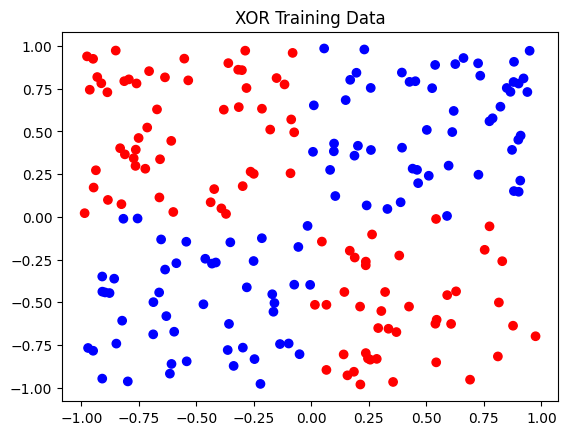

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Generate XOR data
np.random.seed(42)
X = np.random.uniform(low=-1, high=1, size=(400, 2))
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.title("XOR Training Data")
plt.show()

# Function to create an MLP model
def create_mlp(l1_penalty=0.0, l2_penalty=0.0):
    model = models.Sequential([
        layers.InputLayer(input_shape=(2,)),
        layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty)),
        layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Function to plot decision boundary with accuracy score
def plot_decision_boundary(model, X, y, title="", poly_features=False):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    if poly_features:
        grid = poly.transform(grid)
        predictions = model.predict(grid).reshape(xx.shape)
    else:
        predictions = (model.predict(grid) > 0.5).astype(int).reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, cmap='bwr', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(f"{title} (Test Accuracy: {test_accuracy_log_reg if title=='Logistic Regression' else test_accuracy_basic:.2f})")
    plt.show()

In [15]:
# Train and evaluate basic MLP
mlp_basic = create_mlp()
mlp_basic.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
_, test_accuracy_basic = mlp_basic.evaluate(X_test, y_test, verbose=0)
print(f"Basic MLP Test Accuracy: {test_accuracy_basic:.2f}")

# Train and evaluate MLP with L1 regularization
mlp_l1 = create_mlp(l1_penalty=0.01)
mlp_l1.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
_, test_accuracy_l1 = mlp_l1.evaluate(X_test, y_test, verbose=0)
print(f"MLP with L1 Regularization Test Accuracy: {test_accuracy_l1:.2f}")

# Train and evaluate MLP with L2 regularization
mlp_l2 = create_mlp(l2_penalty=0.01)
mlp_l2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
_, test_accuracy_l2 = mlp_l2.evaluate(X_test, y_test, verbose=0)
print(f"MLP with L2 Regularization Test Accuracy: {test_accuracy_l2:.2f}")

# Add polynomial features to the dataset for logistic regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train logistic regression on polynomial features
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

# Predict and evaluate logistic regression
train_accuracy_log_reg = log_reg.score(X_train_poly, y_train)
test_accuracy_log_reg = log_reg.score(X_test_poly, y_test)
print(f"Logistic Regression Train Accuracy: {train_accuracy_log_reg:.2f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_log_reg:.2f}")

C:\Users\krush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Basic MLP Test Accuracy: 0.97
MLP with L1 Regularization Test Accuracy: 0.95
MLP with L2 Regularization Test Accuracy: 0.97
Logistic Regression Train Accuracy: 0.96
Logistic Regression Test Accuracy: 0.95


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


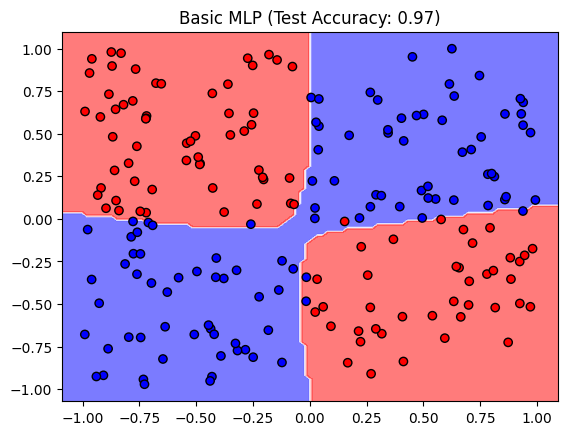

In [16]:
plot_decision_boundary(mlp_basic, X_test, y_test, title="Basic MLP")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


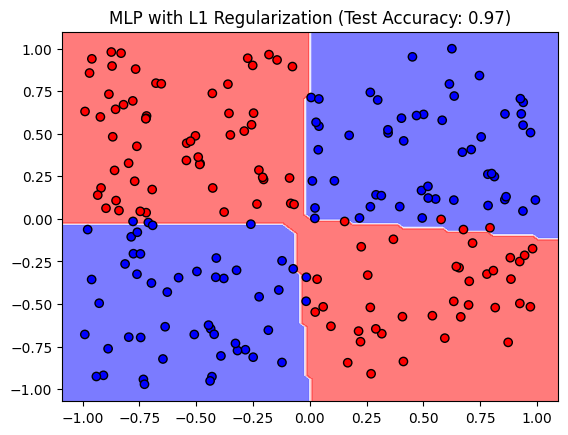

In [17]:
plot_decision_boundary(mlp_l1, X_test, y_test, title="MLP with L1 Regularization")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


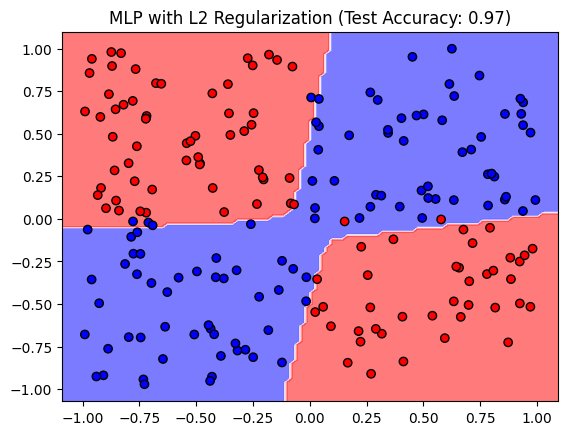

In [18]:
plot_decision_boundary(mlp_l2, X_test, y_test, title="MLP with L2 Regularization")

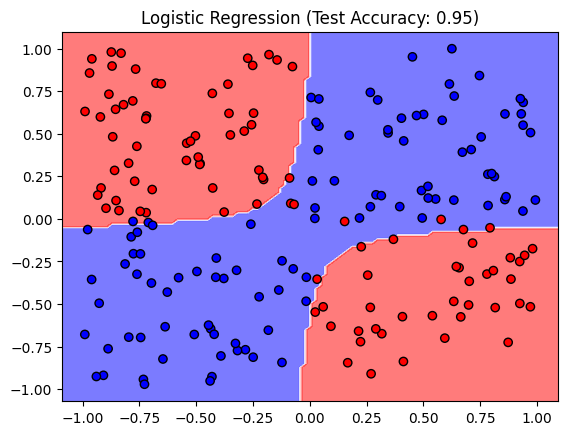

In [19]:
plot_decision_boundary(log_reg, X_test, y_test, title="Logistic Regression", poly_features=True)

Observation:
1. The basic MLP achieved a high test accuracy of 97%. This indicates that the model is very effective in classifying the XOR dataset, demonstrating its capability to learn complex, non-linear decision boundaries without regularization.
2. The MLP with L1 regularization attained a slightly lower test accuracy of 95%. This reduction suggests that while L1 regularization helps in reducing overfitting by enforcing sparsity in the model weights, it may also limit the model's ability to fit the training data as effectively as the basic MLP.
3. Similar to the basic MLP, the MLP with L2 regularization also achieved a test accuracy of 97%. This indicates that L2 regularization effectively maintains model performance while preventing overfitting, as it adds a penalty based on the square of the weights.
4. The test accuracy for logistic regression was 95%, showing that the model generalizes well to unseen data. However, it is slightly lower than the MLP models. This suggests that while logistic regression with polynomial features performs well, it may not capture the complexity of the XOR problem as effectively as the MLPs.

